# Analysis - Task 5

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as pdp
import sys
sys.path.append('../../Scripts')
from MS2_CleanRawData import *
# Emma Path '/Users/emmarutledge/Desktop/DATA301/course-project-group_1036/data/raw/google_review_ratings.csv'
Amenities = load_clean_Ammenities('../../../data/raw/google_review_ratings.csv')
Art_and_History = load_clean_Art_and_History('../../../data/raw/google_review_ratings.csv')
Food_and_Beverage = load_clean_Food_and_Beverage('../../../data/raw/google_review_ratings.csv')
Recreation, Outdoors = load_clean_Recreation('../../../data/raw/google_review_ratings.csv')

**With this kind of data set, it is important to take note that there will be an inevitable selection bias. It is a general assumption that within voluntary response surveys, those who are dissatisfied are more likely to fill out a review**

**If the data set provided more metadata, there would be opportunity for deeper analyses; incorporating sex, age, country, or date of review would allow for more thorough analyses of the data.** 

## Research Questions - Visualized and Answered

### 1.   Is Europe a high ranking continent for experiencing art and history?

In [8]:
Amen_Describe = Amenities.describe()
Art_Describe = Art_and_History.describe()
Food_Describe = Food_and_Beverage.describe()
Recreation_Describe = Recreation.describe()
Outdoors_Describe = Outdoors.describe()

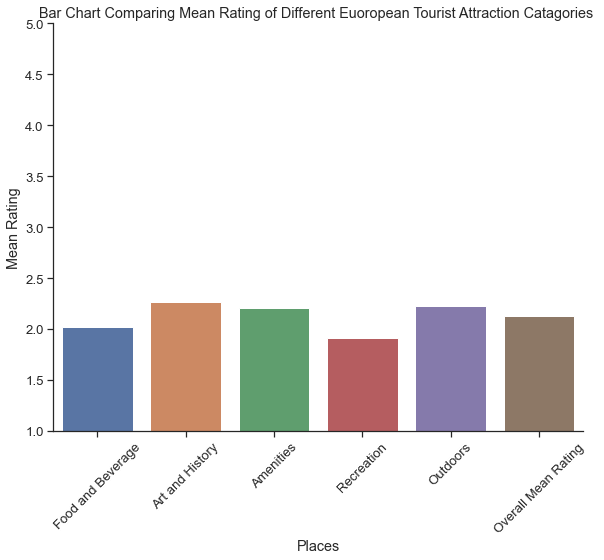

In [46]:
# pulled mean values from the describe data frames above. 
meanFood = ((3.054909+2.623560+2.019657+2.148252+1.170509+1.121028)/6)
meanArt = ((1.524897+3.024621+2.956511+2.187819+1.621635)/5)
meanAmenities = ((1.541881+2.796618+3.314854+2.465097+2.126362+0.999344)/6)
meanRec = ((2.425654+2.455940+2.792562+2.437275+1.237477+1.028606+1.233112+1.965013+1.691860)/9)
meanOutdoors = ((2.455940+2.792562+1.965013+1.691860)/4)
meanGoogleRating = ((meanFood + meanArt + meanAmenities + meanRec + meanOutdoors)/5)

m = {'Places': ['Food and Beverage', 'Art and History', 'Amenities', 'Recreation', 'Outdoors', 'Overall Mean Rating'],
     'Mean Rating': [meanFood, meanArt, meanAmenities, meanRec, meanOutdoors, meanGoogleRating]}
MeanRatingsDf = pd.DataFrame(data=m)

sns.set_style("ticks")
fig, ax = plt.subplots()
fig.set_size_inches(9.5,7.5)
plt.ylim([1, 5])
sns.barplot(data= MeanRatingsDf,
            x='Places',
            y='Mean Rating')
plt.xticks(rotation=45)
plt.title("Bar Chart Comparing Mean Rating of Different Euoropean Tourist Attraction Catagories ") 
sns.set(font_scale=1.5)
sns.despine()

This bar graph provides a visual on the average rating across each catergory provided in this dataset. As a tourist, this bar graph would tell you that most people enjoy exploring the art and history, outdoor activities and amenities that Europe has to offer. We hypothesized that Europe would have a high rating within art and history as there are many famous events that have occured there, which would result in clientelle that would appreciate this culture. This dataset supports our hypothesis that Europe would be a phenominal choice if one desired to gain a rich understanding of art and history. It is the highest rated tourist attraction in this particular dataset, implying that it is the most enjoyed activity within Europe.

### 2. Do users who provide a high rating to theatres, tend to give parks a low rating? 

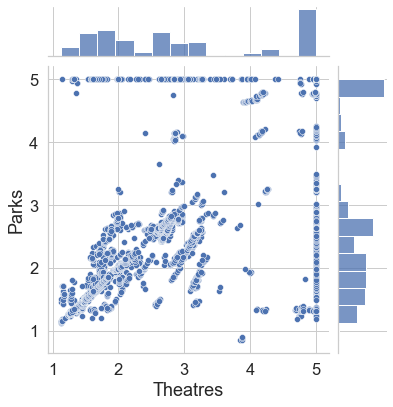

In [52]:
Art_Outdoors_df = pd.concat([Art_and_History, Outdoors], axis=1)
sns.set_style("whitegrid")
sns.jointplot(data=Art_Outdoors_df,
              x= Art_Outdoors_df['Theatres'],
              y=Art_Outdoors_df['Parks'])
sns.set(font_scale=1.5)
fig.set_size_inches(14,12)

Within the category of *Art and History* and the *Outdoors*, Theatres and Parks were the highest rated. We wanted to take a look to see if people who rated theatres high, would also rate parks low, and vice versa (Based on general demographics). The plot above shows the correlation of ratings between parks and theatres. Our hypothese was a that there would be a negative trendline, showing that those who enjoy the theatre, do not enjoy the parks as much. After visualizing the plot, it is apparently that our hypothese is not supported by that data provided. Although there are a fair amount of points building towards the 5 star axes, the majority of the data still lies between 1 and 3 star ratings.

### 3. Do the Google reviews from this dataset support Europe in is worldwide recognition of having exquisite cuisine?

It is important to note that Europe is very large, and although many countries within are notorious for their food, there are many countries that are not, which will have a large impact of the average rating. Below, is a graph of the average ratings per category of Food/Beverage facility.

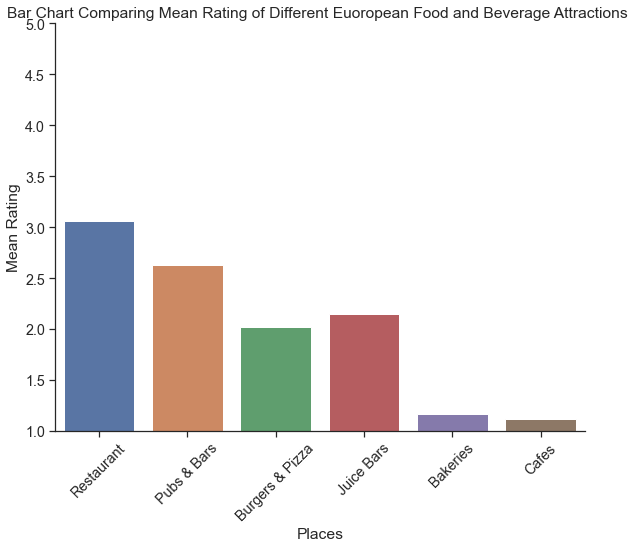

In [63]:
d = {'Places': ['Restaurant', 'Pubs & Bars', 'Burgers & Pizza', 'Juice Bars', 'Bakeries', 'Cafes'],
     'Mean Rating': [3.054909485879797,2.6235602220613083,2.019657253198165, 2.1482524740526188, 1.1705092927830074, 1.1210282404055032]}
MeanRatingsDf = pd.DataFrame(data=d)


sns.set_style("ticks")
fig, ax = plt.subplots()
fig.set_size_inches(9.5,7.5)
plt.ylim([1, 5])
sns.barplot(data= MeanRatingsDf,
            x='Places',
            y='Mean Rating')
plt.xticks(rotation=45)
plt.title("Bar Chart Comparing Mean Rating of Different Euoropean Food and Beverage Attractions ") 
sns.set(font_scale=1.2)
sns.despine()

Here, we can see that bakeries and cafes are the lowest rated amoungst the recorded food and beverage categories, which was unexpected. Our hypothesis that Europe would be given a high food and beverage industry ratings is not supported by this particular dataset. Despite these low ratings, European restaurants still have relatively high ratings. This information would be useful to suggest to tourists in Europe which food and beverage attractions are more likely to be enjoyable. Furthermore, this is useful knowledge for business owneners and entepreneurs as these tourists accomodations are clearly lacking satisfactory service. It lets these people know where customer feedback is needed and where the market has room to grow. For example, a cafe that has good customer satisfaction would likely be much more profitable than those with low reviews

### Compare Ratings Distribution across Food and Beverage Catagories

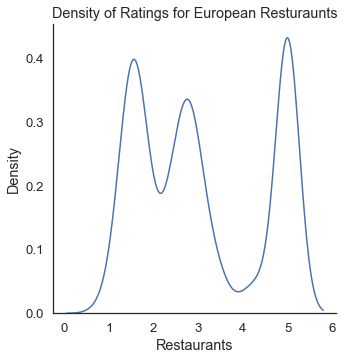

In [69]:
sns.set_style("white")
sns.displot(data=Food_and_Beverage,
              x=Food_and_Beverage['Restaurants'],
             kind='kde')
sns.set(font_scale=1.2)
plt.title("Density of Ratings for European Resturaunts") 
sns.despine()

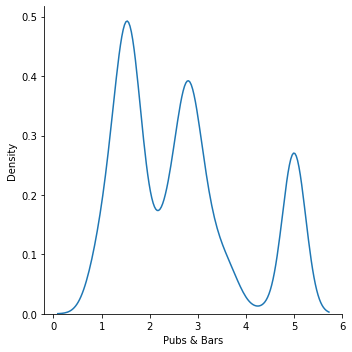

In [23]:
sns.set_style("white")
sns.displot(data=Food_and_Beverage,
              x=Food_and_Beverage['Pubs & Bars'],
             kind='kde')

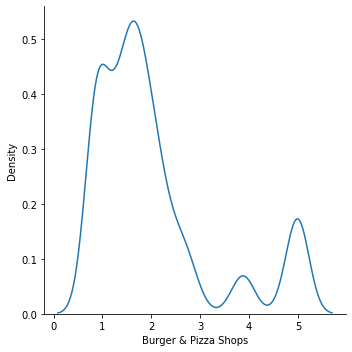

In [30]:
sns.set_style("white")
sns.displot(data=Food_and_Beverage,
              x=Food_and_Beverage['Burger & Pizza Shops'],
             kind='kde')

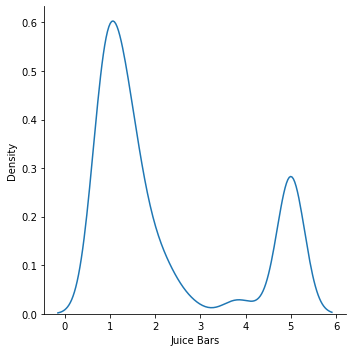

In [27]:
sns.set_style("white")
sns.displot(data=Food_and_Beverage,
              x=Food_and_Beverage['Juice Bars'],
             kind='kde')

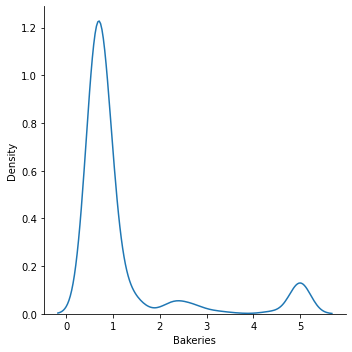

In [28]:
sns.set_style("white")
sns.displot(data=Food_and_Beverage,
              x=Food_and_Beverage['Bakeries'],
             kind='kde')

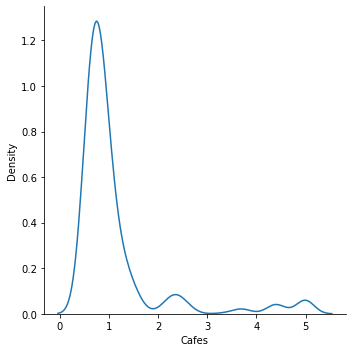

In [29]:
sns.set_style("white")
sns.displot(data=Food_and_Beverage,
              x=Food_and_Beverage['Cafes'],
             kind='kde')

The distribution of resturaunt ratings shows us that this catagory recieves a greater number of positive reviews (>4) than any other catagory. Furthermore, cafes and bakeries recieve very little postitve reviews. This supports the discussion above.